<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Additional imports

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [4]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
# Compile and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.3467 - accuracy: 0.8887 - val_loss: 0.1441 - val_accuracy: 0.9544
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1076 - accuracy: 0.9673 - val_loss: 0.0981 - val_accuracy: 0.9710
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0755 - accuracy: 0.9772 - val_loss: 0.0833 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0591 - accuracy: 0.9818 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0528 - val_accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0402 - accuracy: 0.9882 - val_loss: 0.0475 - val_accuracy: 0.9864
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0456 - val_accuracy

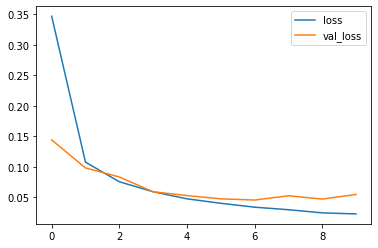

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

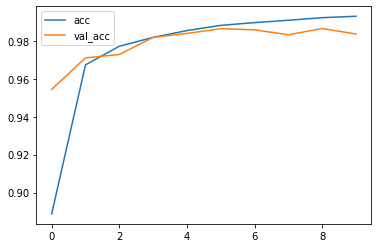

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    2    0    0    0    2    2    2    0]
 [   0 1129    2    0    0    0    3    1    0    0]
 [   0    1 1025    3    0    0    1    1    1    0]
 [   0    0    8  991    0   11    0    0    0    0]
 [   0    0    1    0  956    0    1    4    1   19]
 [   1    0    0    3    0  885    1    0    2    0]
 [   1    2    1    0    3    8  942    0    1    0]
 [   0   12    8    4    0    0    0 1004    0    0]
 [   4    0    4    3    0    7    1    1  954    0]
 [   2    0    0    2    7    2    0   12    6  978]]


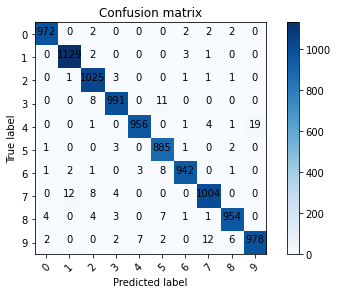

In [8]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function print and plot the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

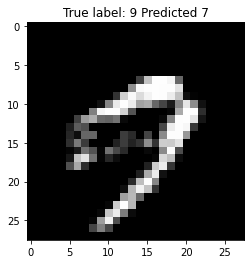

In [15]:
# Show some misclassified 
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]));